<a href="https://colab.research.google.com/github/Mona1804/mona/blob/main/Cardiovaslular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project** **Title** : **Cardiovascular** **Risk** **Prediction**


                                           Name : Monika kamble 

**Index**:

Problem statement

Importing the libraries and the dataset

Understand the data

Data cleaning

Handling missing data

Exploratory data analysis

Feature selection

Data preprocessing

ML model implementation

Results

Summary and conclusions

References


**Variable** **Description**:

Sex: male or female ("M" or "F")

Age: Age of the patient 

Education: The level of education of the patient (categorical values - 1,2,3,4)

is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

Tot Chol: total cholesterol level 

Sys BP: systolic blood pressure 

Dia BP: diastolic blood pressure

BMI: Body Mass Index 

Heart Rate: heart rate 

Glucose: glucose level 

**Importing** **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set() 

In [2]:
# Importing data
path = '/content/data_cardiovascular_risk.csv'

df = pd.read_csv(path,index_col='id')
     

In [3]:
# First 5 rows of the dataset 
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
#First 5 Column of data set
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [5]:

# Dataset Rows & Columns 
df.shape
     

(3390, 16)

In [6]:

# Dataset Info
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


**Description**



*   Sex : Gender
*   Age : age 











In [7]:
# checking duplicates
len(df[df.duplicated()])

0

In [8]:
# checking null values
df.isna().sum().sum()

510

<Axes: ylabel='id'>

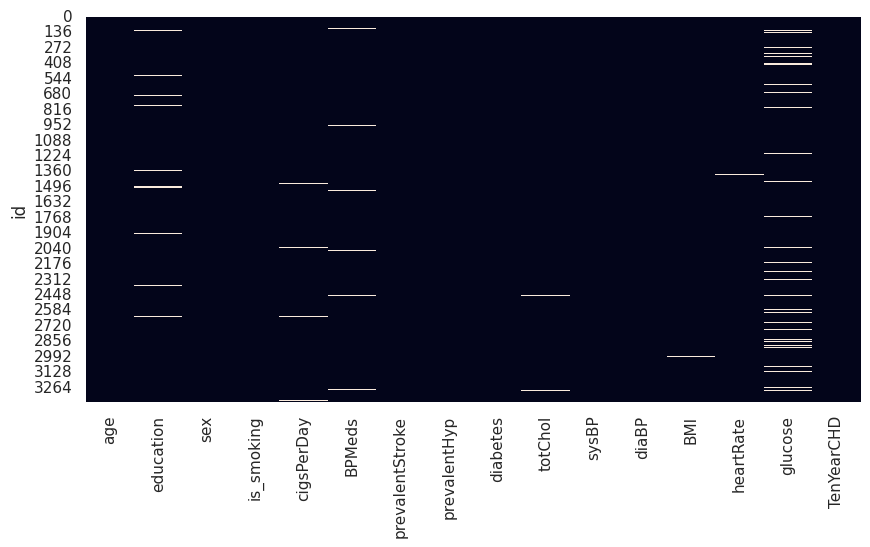

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
     

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
The dataset contains 3390 rows and 16 columns. There are no duplicate records, and contains 510 missing values.

Data Cleaning 

In [10]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:

# Dataset Describe
df.describe(include='all')
     

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [12]:

# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Unique values in",i,":",df[i].nunique())
     

Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigs_per_day : 32
Unique values in bp_meds : 2
Unique values in prevalent_stroke : 2
Unique values in prevalent_hyp : 2
Unique values in diabetes : 2
Unique values in total_cholesterol : 240
Unique values in systolic_bp : 226
Unique values in diastolic_bp : 142
Unique values in bmi : 1259
Unique values in heart_rate : 68
Unique values in glucose : 132
Unique values in ten_year_chd : 2


In [14]:

# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [15]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

**Handling** **missing**  **Data** **set**

In [16]:
# checking for null values
df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [17]:
# total null values
df.isna().sum().sum()
     

510

**Replacing** **the** **missing** **values** **in** **the** **categorical** **columns** **with** **the** **most** **frequent** **entry**:

In [18]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])
     

In [19]:
# education distribution after mode imputation
df.education.value_counts()
     

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [20]:

# bp_meds distribution after mode imputation
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

 **cigs_per_day:**

In [21]:
# Mean and median number of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [22]:

# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [23]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigs_per_day'].mean(),df[df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)



  Mean number of cigarettes for a smoker = 18.34

   Median number of cigarettes for a smoker = 20

   




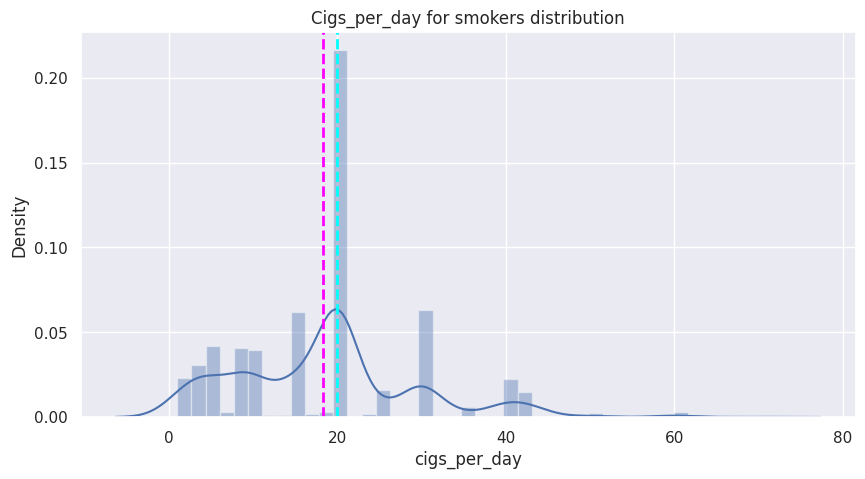

In [24]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

<Axes: >

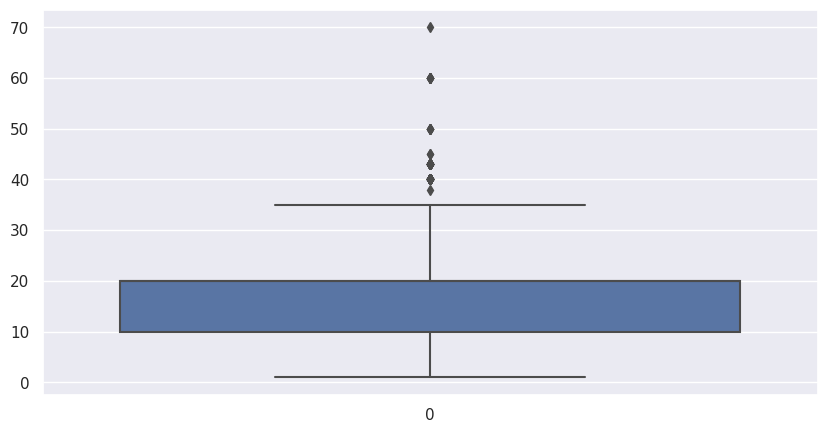

In [25]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])
     


**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.**

In [26]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())
     


In [27]:

# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [28]:

# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]
     

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


**5.3. total_cholestrol, bmi, heart_rate:**

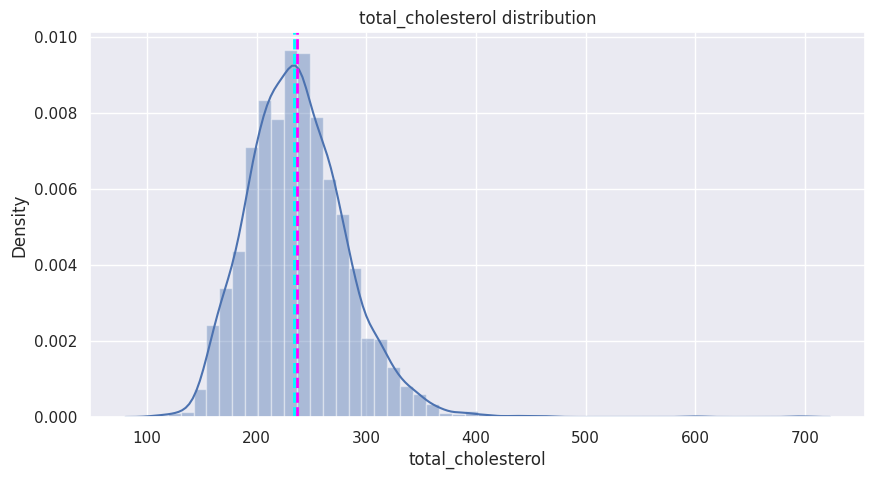

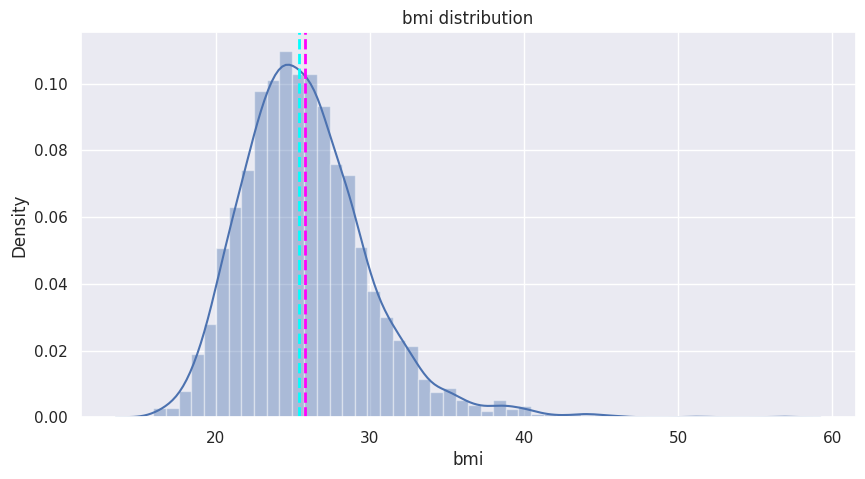

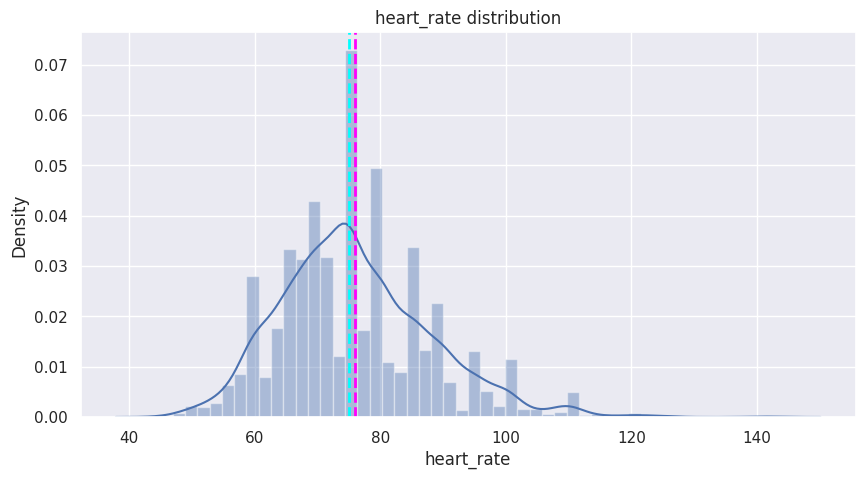

In [29]:

# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

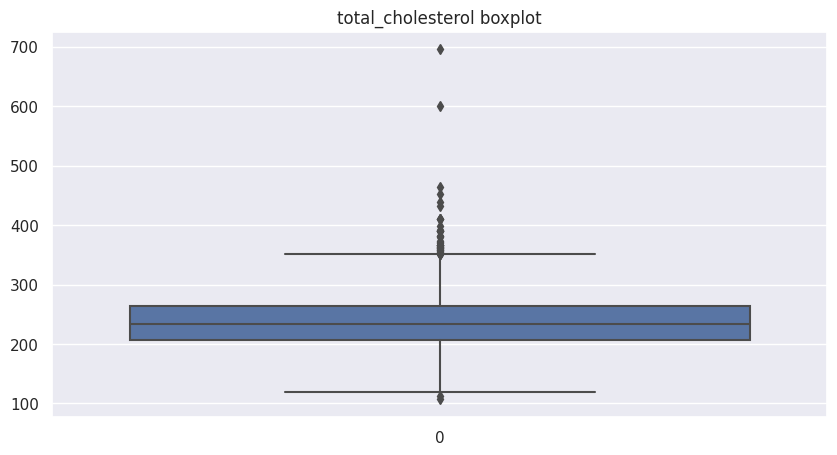

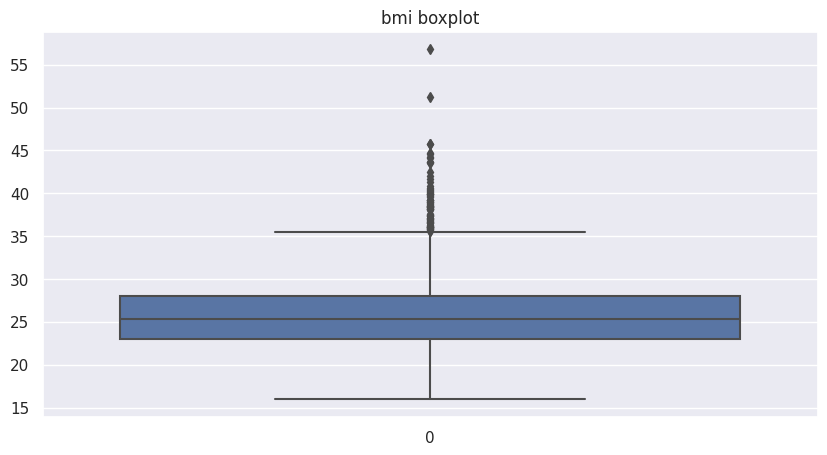

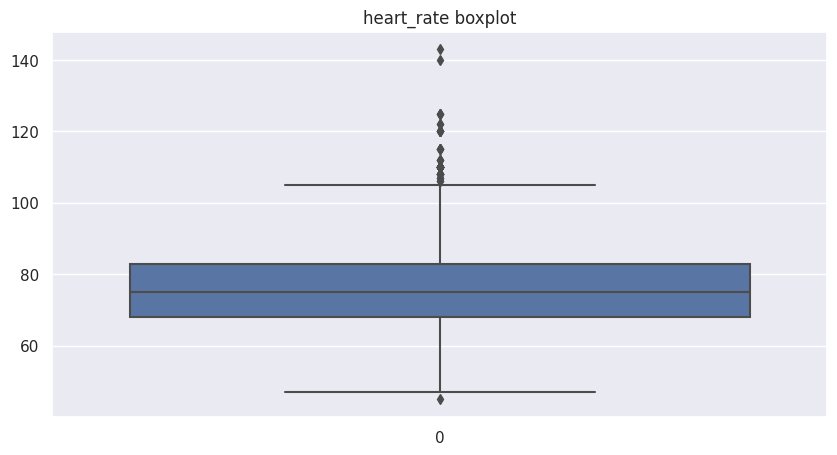

In [30]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

**The total_cholestrol, bmi, and heart_rate columns contain outliers.**

In [31]:
# Mean and median for total_cholesterol
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [32]:
# Mean and median for bmi
df.bmi.mean(),df.bmi.median()

(25.7949644549763, 25.38)

In [33]:
# Mean and median for heart_rate
df.heart_rate.mean(),df.heart_rate.median()
     

(75.97727943346119, 75.0)

**Since** **the** **total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing **values with its median. 
**bold text**

In [34]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())
     

In [35]:

# mean and median of total_cholesterol after median imputation
df.total_cholesterol.mean(),df.total_cholesterol.median()
     

(237.03982300884957, 234.0)

In [36]:
# mean and median of bmi after median imputation
df.bmi.mean(),df.bmi.median()

(25.793250737463126, 25.38)

In [37]:
# mean and median of heart_rate after median imputation
df.heart_rate.mean(),df.heart_rate.median()
     

(75.97699115044247, 75.0)

**5.4**. **glucose**:


In [38]:

# total missing values in glucose
df.glucose.isna().sum()

304

**The** **glucose** **column** **contains** **304** **missing** **values**.



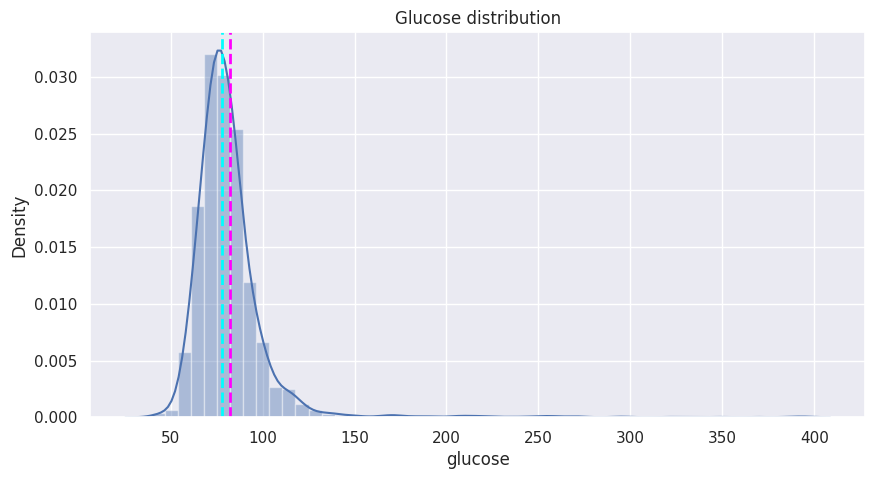

In [39]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

**The** **glucose** **column** **is** **positively** **skewed**.



Text(0.5, 1.0, 'Glucose boxplot')

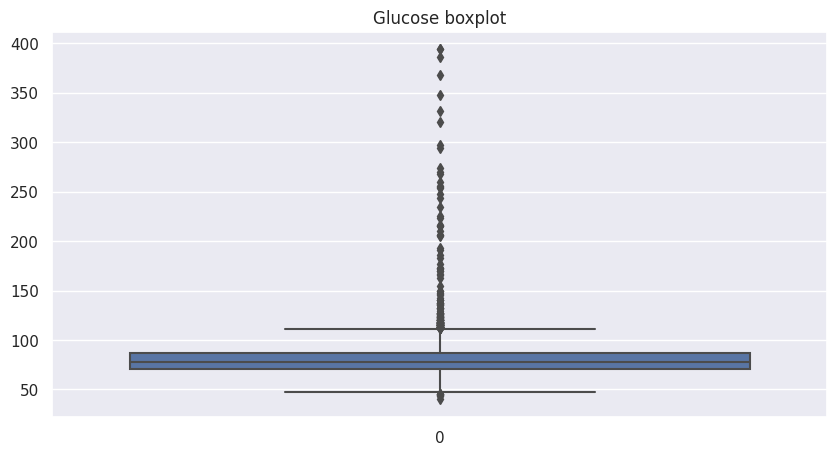

In [40]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

**The** **glucose** **column** **contains** **outliers**.



In [ ]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()
     

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

The distribution is positively skewed, with outliers.

There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.

To avoid this we can impute the missing values using KNN imputer.
If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.



In [41]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [42]:
# mean, median, and mode for glucose after knn imputation
df.glucose.mean(),df.glucose.median(),df.glucose.mode()
     

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.



In [44]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [45]:
# checking for missing values
df.isna().sum()
     

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

**We** **have** **successfully** **handled** **all** **the** **missing** **values** **in** **the** **dataset**.



 **Exploratory Data Analysis:**

Text(0.5, 1.0, 'ten_year_chd distribution')

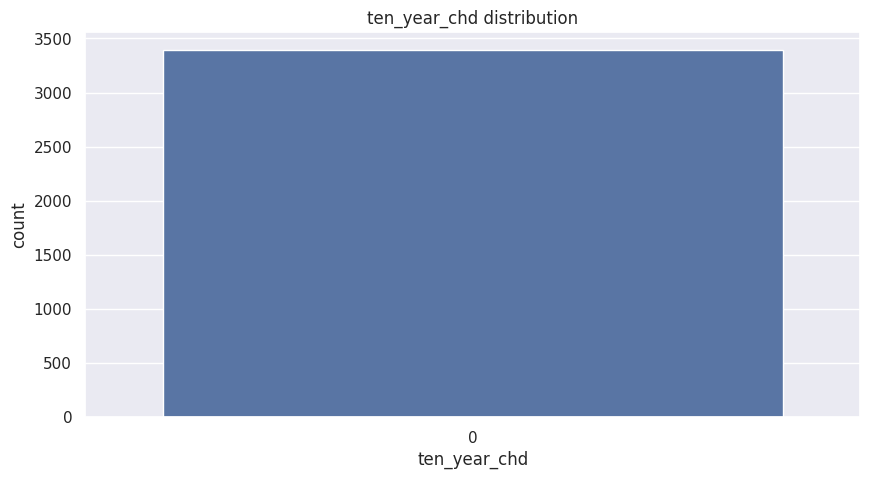

In [46]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')
     

**The dependent variable - 10 year risk of CHD is unbalanced.**

In [47]:
# Distribution of dependent variable
df[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
dtype: int64

In [48]:

# unbalanced distribution
511/(2879+511)
     

0.15073746312684366

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

 Analyzing the distribution of the continuous independent variables:


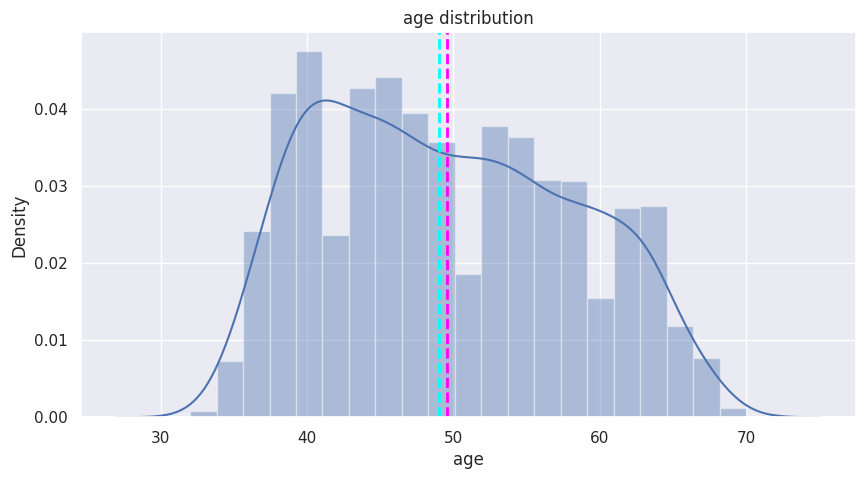

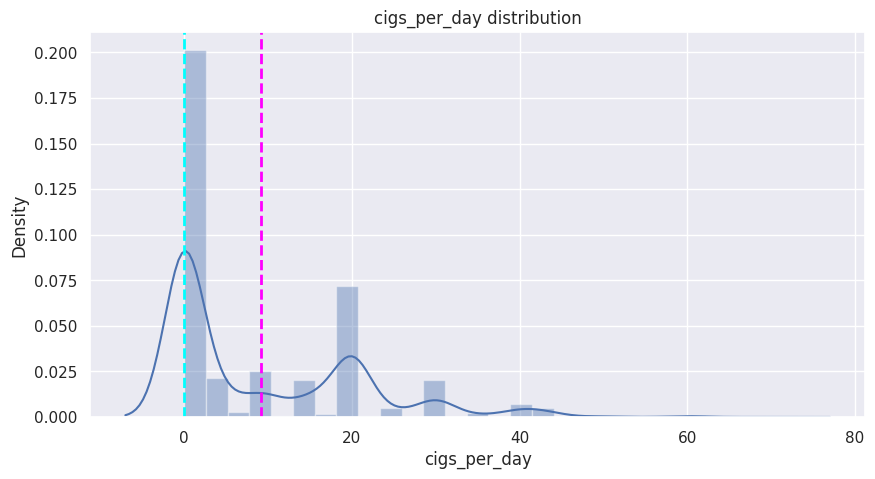

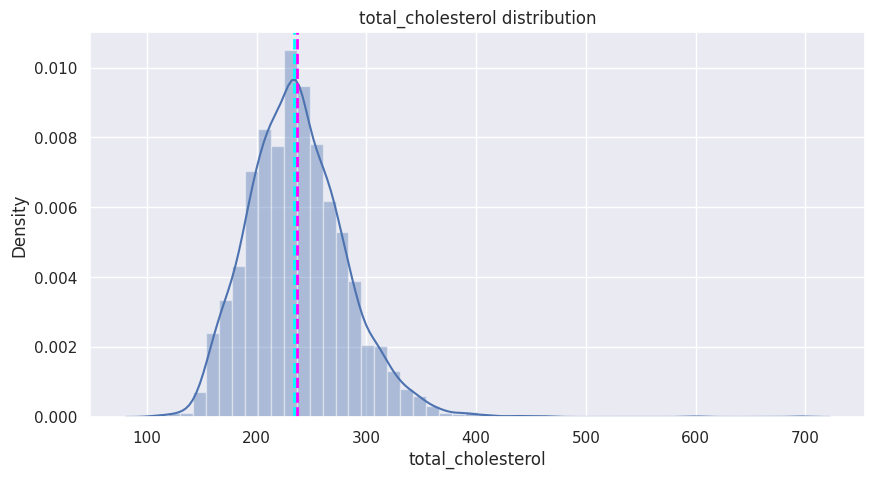

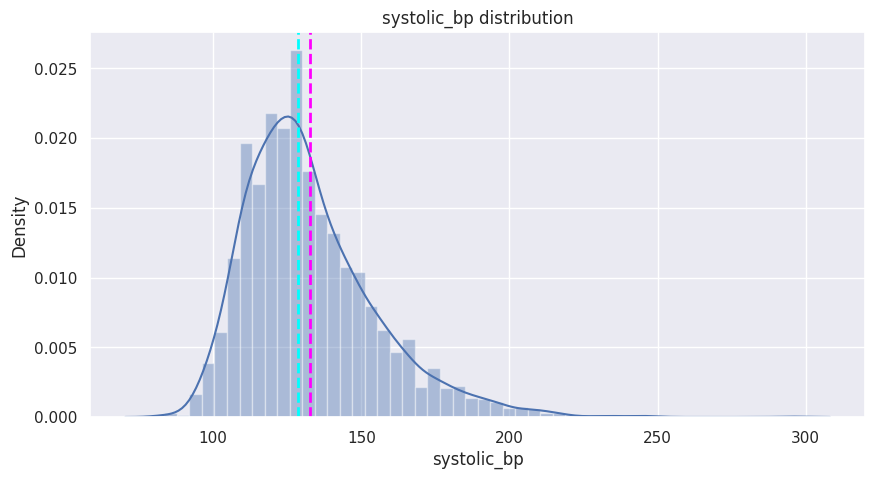

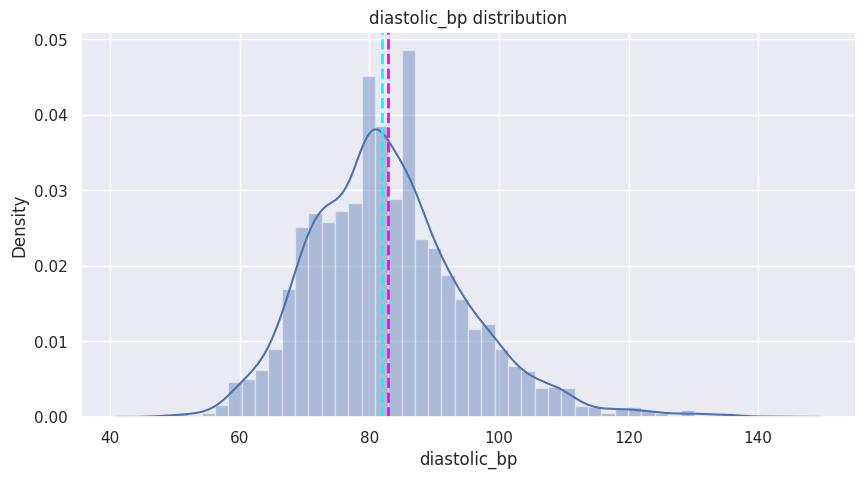

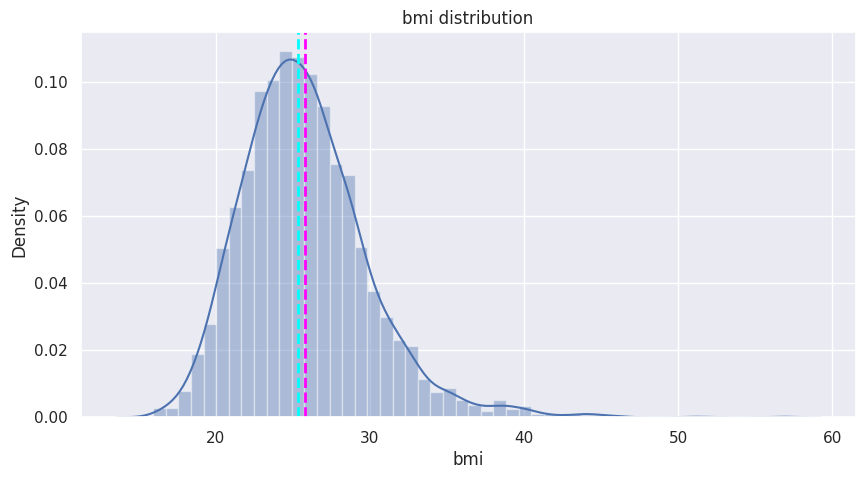

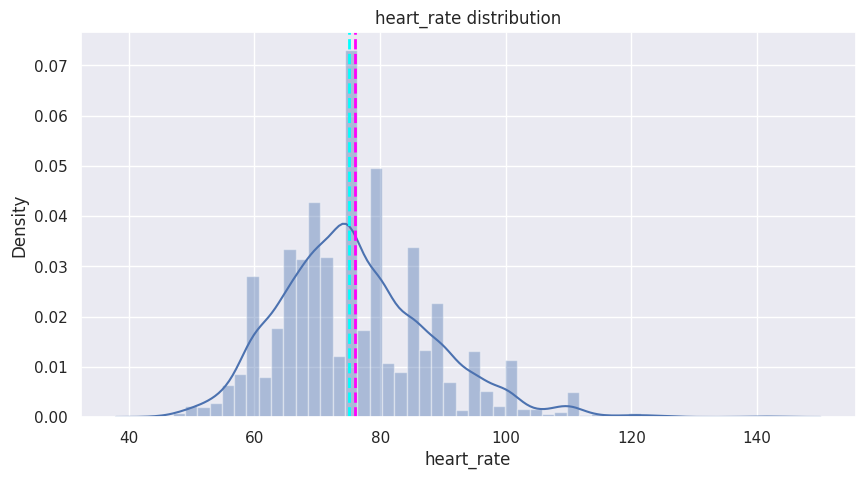

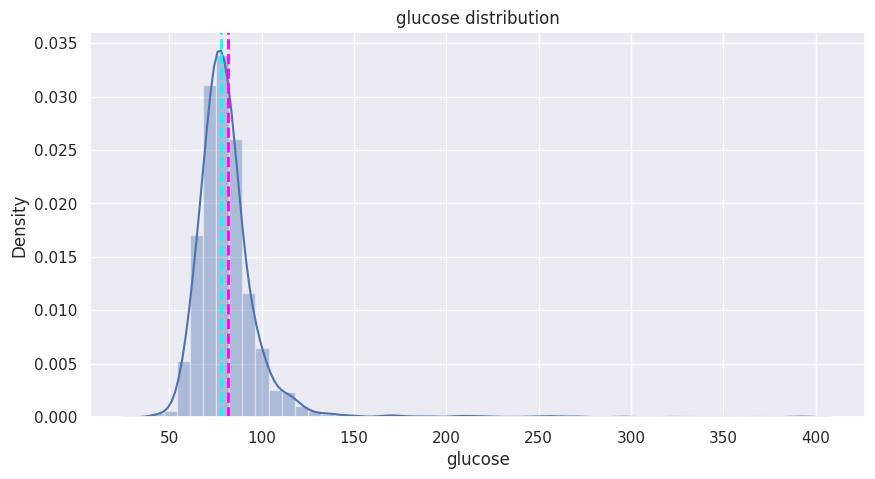

In [49]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()
     

**The distribution of several features is skewed, and contains outliers. We'll deal with the skew afterwards.**

**Correlation** **analysis**:

<Axes: title={'center': 'Correlation Analysis'}>

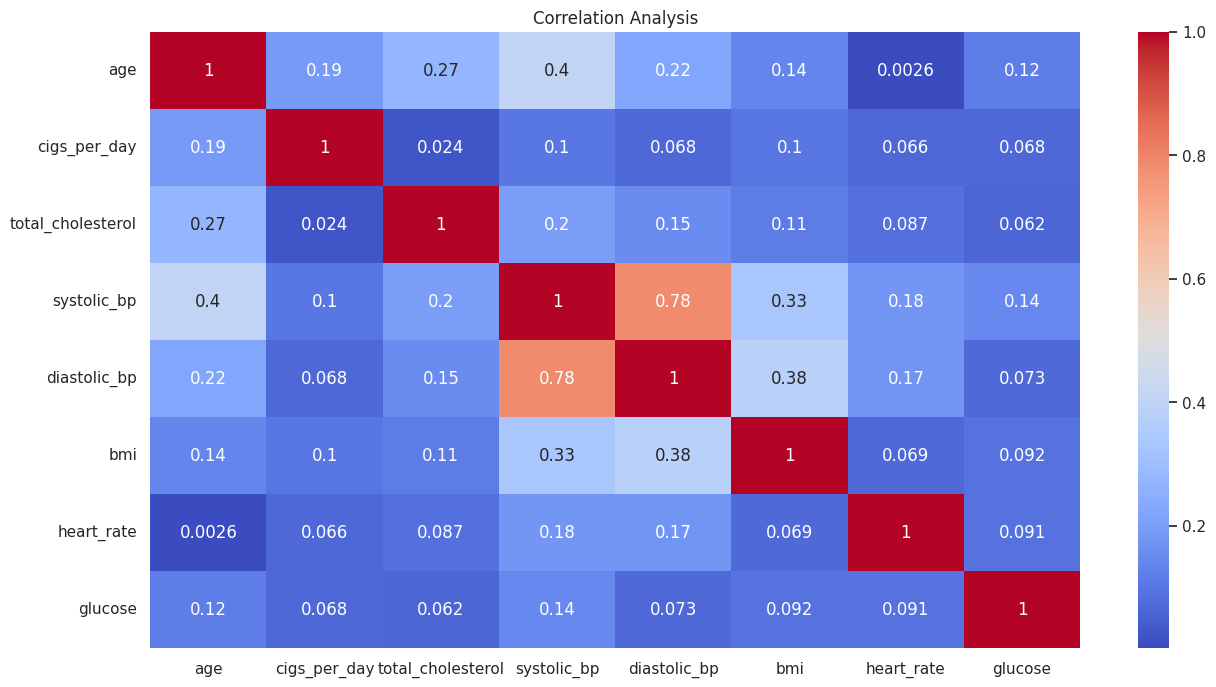

In [50]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Above is the correlation magnitude heatmap for all the continuous variables in the dataset.

The variables systolic BP and diastolic BP are highly correlated.



**Handling** **Multicollinearity**:

In [51]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

**Pulse Pressure = Systolic BP - Diastolic BP**

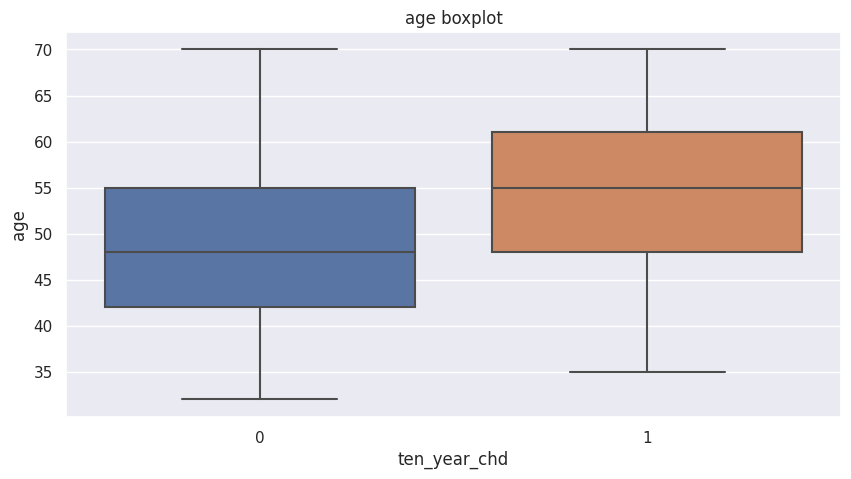

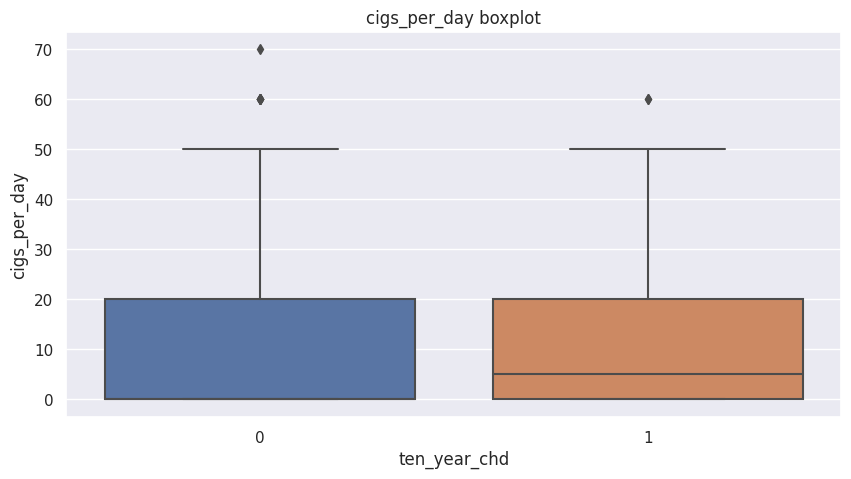

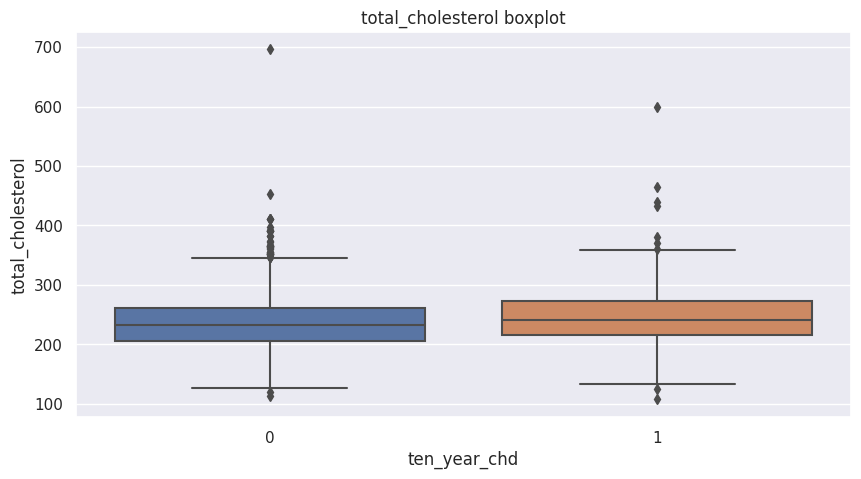

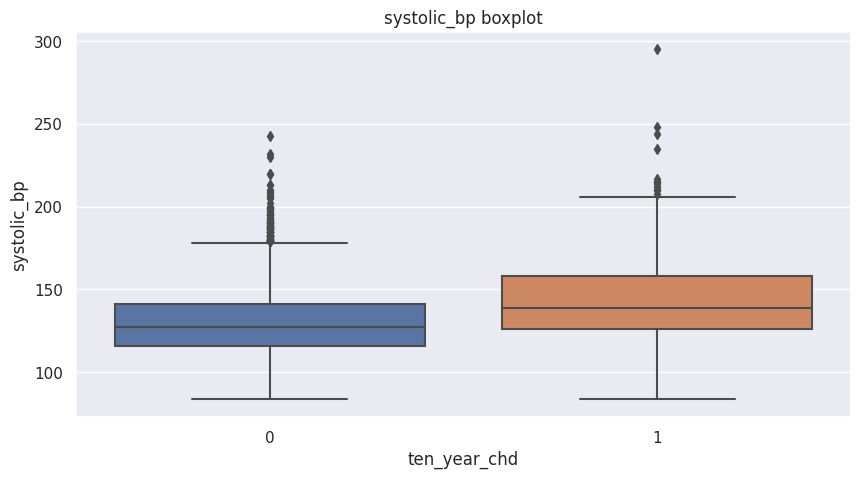

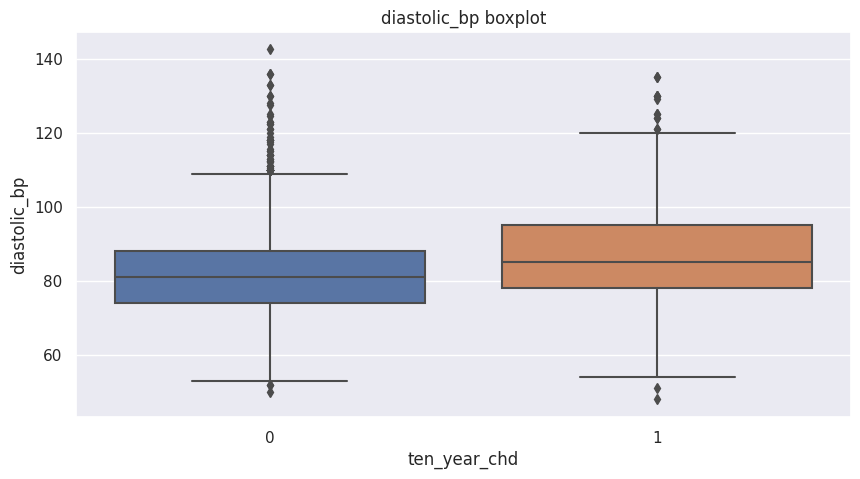

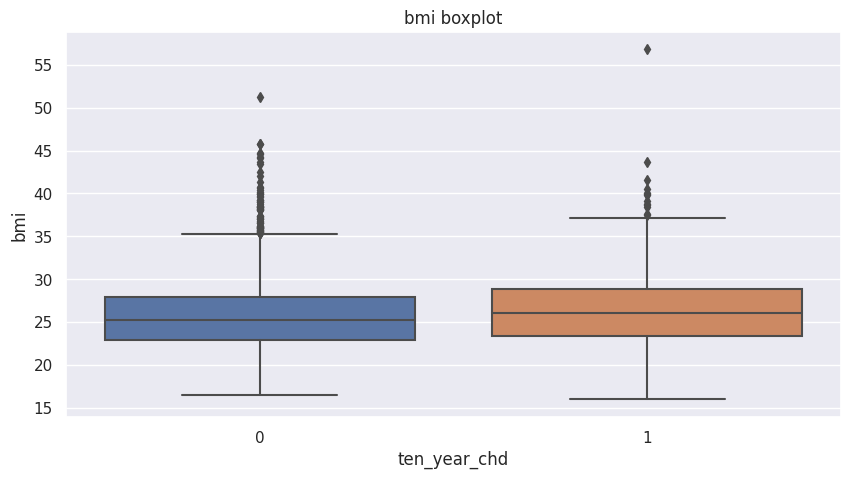

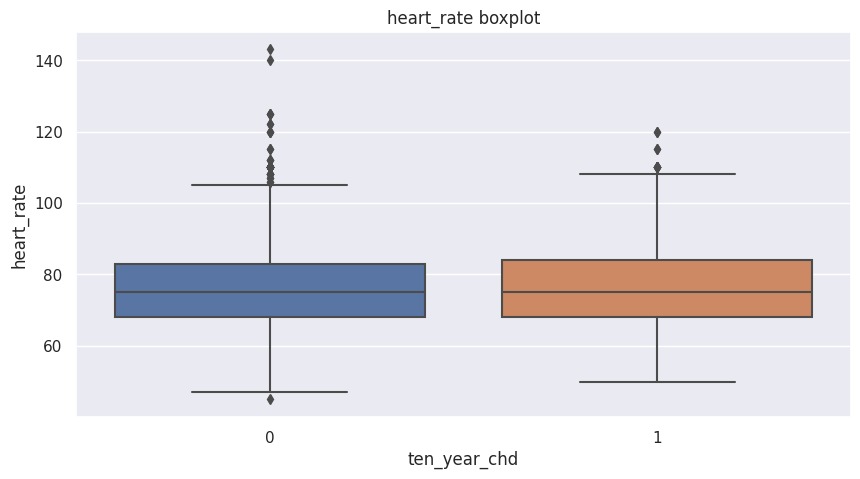

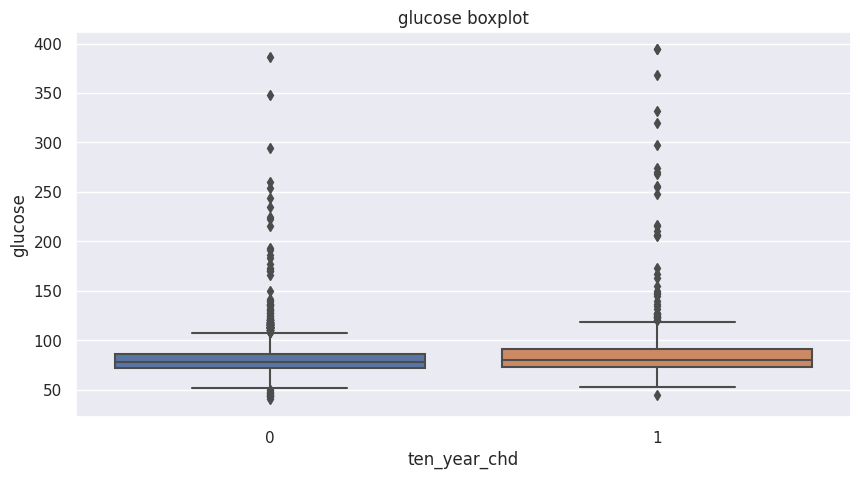

In [52]:
# checking for outliers in continuous features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()
     

There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.

Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.

This is done on the train data only to prevent data leakage.

**Data** **Preprocessing**

In [53]:
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]
     

**Train** **Test** **Split**:


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)


In [55]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [56]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [57]:
# Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [58]:
#Proportion of positive outcomes in test dataset
153/(153+864)
     

0.1504424778761062

The train and test set contain almost equal proportion of results.



<Figure size 1000x500 with 0 Axes>

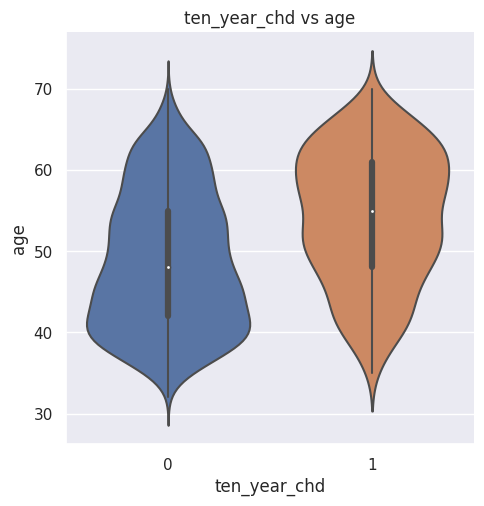

<Figure size 1000x500 with 0 Axes>

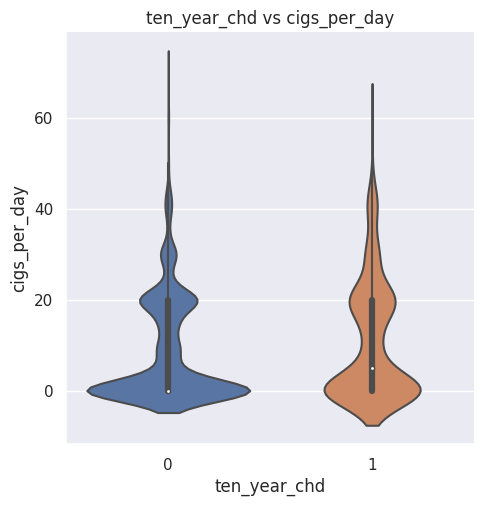

<Figure size 1000x500 with 0 Axes>

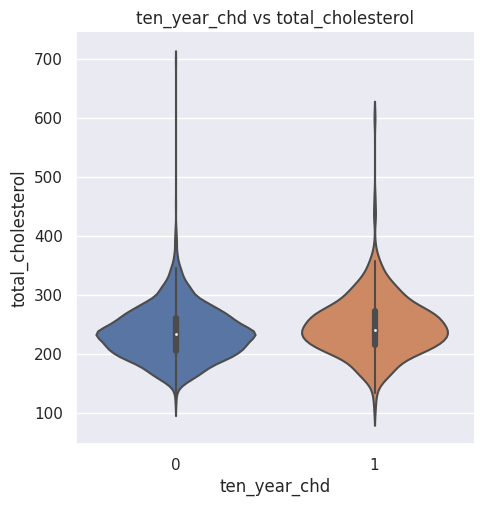

<Figure size 1000x500 with 0 Axes>

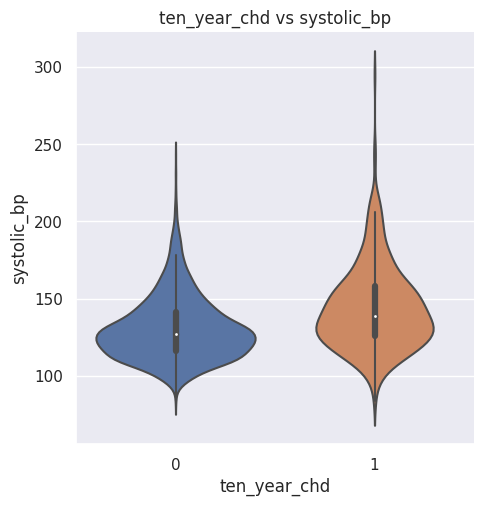

<Figure size 1000x500 with 0 Axes>

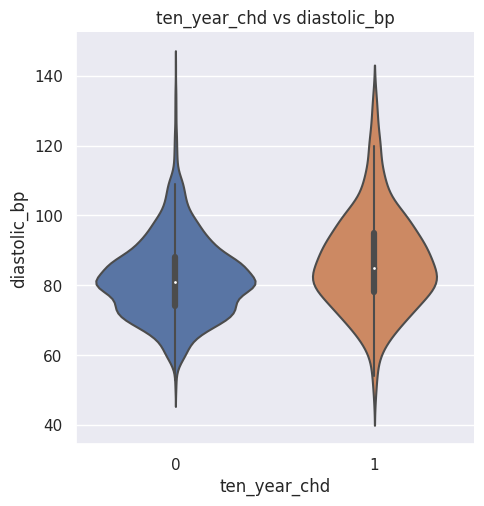

<Figure size 1000x500 with 0 Axes>

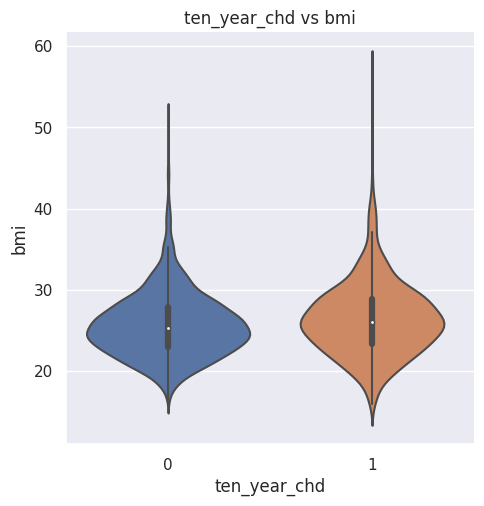

<Figure size 1000x500 with 0 Axes>

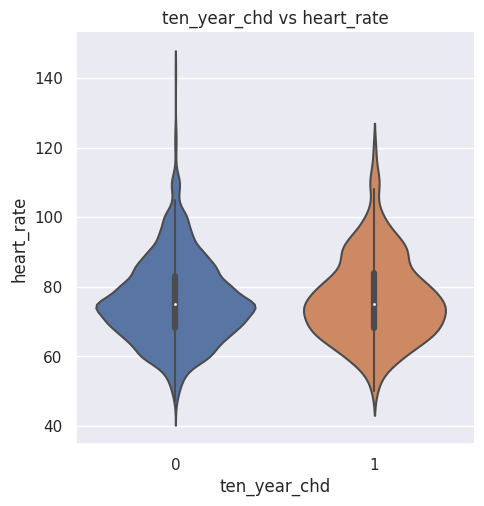

<Figure size 1000x500 with 0 Axes>

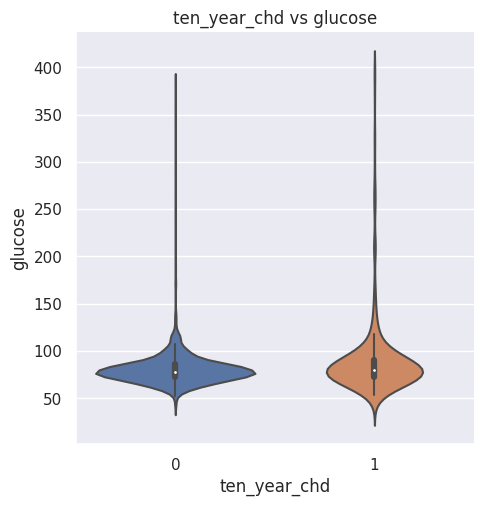

In [59]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()
     

The risk of CHD is higher for older patients than younger patients.

No conclusive evidence on the risk of CHD with other continuous variables

**Oversampling** :

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

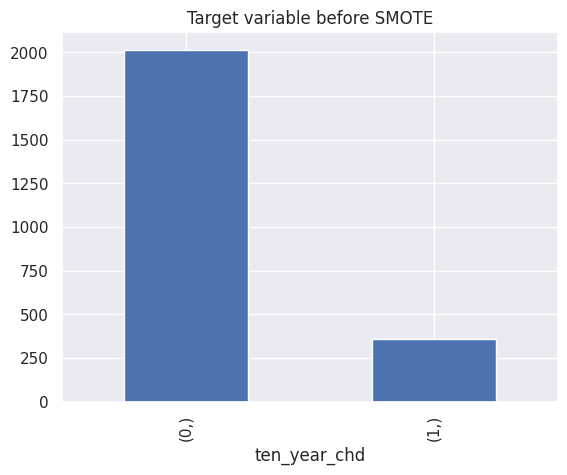

In [63]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [64]:

# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))
     

Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

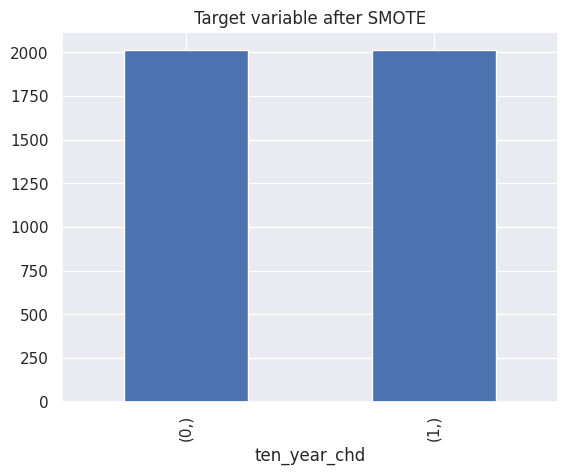

In [65]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.



**Conclusion**

The normal pulse pressure is around 40 mmHg

Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.

Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.

Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.

From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.

Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.
